In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
%cd drive/My Drive/HW1/homeworks

/content/drive/My Drive/HW1/homeworks


In [3]:
from text_adventure_games import (
    games, parsing, actions, things, blocks
)

In [4]:
## Locations

entrance = things.Location(
    "Library Entrance",
    "You stand at the entrance of an ancient, mystical library. Bookshelves tower above you, filled with arcane knowledge."
)
grand_hall = things.Location(
    "Grand Hall",
    "A vast hall with a domed ceiling painted with constellations. Magical lights flicker in the air."
)
reading_room = things.Location(
    "Reading Room",
    "A cozy room with comfortable chairs and magical floating lamps. Perfect for reading enchanted books."
)
map_room = things.Location(
    "Map Room",
    "Walls covered in shifting magical maps of both real and imaginary realms. A large globe floats in the center."
)
restricted_section = things.Location(
    "Restricted Section",
    "A dark, foreboding area of the library. Dangerous magical tomes are kept here, protected by magical wards."
)
alchemy_lab = things.Location(
    "Alchemy Lab",
    "Bubbling potions and strange apparatus fill this room. The air shimmers with magical residue."
)
astral_observatory = things.Location(
    "Astral Observatory",
    "A domed room with a giant magical telescope. The ceiling shows a real-time view of the cosmos."
)
cursed_vault = things.Location(
    "Cursed Vault",
    "A chamber filled with cursed artifacts. Entering unprepared could be fatal."
)

# Map of Locations
entrance.add_connection("north", grand_hall)
grand_hall.add_connection("south", entrance)
grand_hall.add_connection("north", reading_room)
grand_hall.add_connection("east", map_room)
grand_hall.add_connection("west", alchemy_lab)
reading_room.add_connection("south", grand_hall)
reading_room.add_connection("east", restricted_section)
map_room.add_connection("west", grand_hall)
map_room.add_connection("up", astral_observatory)
restricted_section.add_connection("west", reading_room)
restricted_section.add_connection("down", cursed_vault)
alchemy_lab.add_connection("east", grand_hall)
astral_observatory.add_connection("down", map_room)
cursed_vault.add_connection("up", restricted_section)

In [5]:
## Items

library_card = things.Item(
    "card",
    "a library card",
    "A MAGICAL LIBRARY CARD THAT GRANTS ACCESS TO DIFFERENT SECTIONS OF THE LIBRARY.",
)
library_card.add_command_hint("use card")
entrance.add_item(library_card)

spectacles = things.Item(
    "spectacles",
    "enchanted spectacles",
    "A PAIR OF SPECTACLES THAT ALLOWS THE WEARER TO READ MAGICAL TEXTS.",
)
spectacles.add_command_hint("wear spectacles")
reading_room.add_item(spectacles)

ancient_tome = things.Item(
    "tome",
    "an ancient tome",
    "A POWERFUL MAGICAL BOOK CONTAINING SECRET KNOWLEDGE.",
)
ancient_tome.add_command_hint("read tome")
restricted_section.add_item(ancient_tome)

protective_amulet = things.Item(
    "amulet",
    "a protective amulet",
    "AN AMULET THAT PROTECTS THE WEARER FROM CURSES.",
)
protective_amulet.add_command_hint("wear amulet")
alchemy_lab.add_item(protective_amulet)

star_chart = things.Item(
    "chart",
    "a celestial star chart",
    "A MAGICAL CHART SHOWING THE POSITIONS OF STARS AND PLANETS.",
)
star_chart.add_command_hint("study chart")
astral_observatory.add_item(star_chart)

magic_quill = things.Item(
    "quill",
    "an enchanted quill",
    "A QUILL THAT CAN WRITE IN THE AIR AND REVEAL HIDDEN TEXT.",
)
magic_quill.add_command_hint("write with quill")
map_room.add_item(magic_quill)

potion_vial = things.Item(
    "vial",
    "a mysterious potion vial",
    "A VIAL CONTAINING A SWIRLING, COLOR-CHANGING LIQUID.",
)
potion_vial.add_command_hint("drink potion")
alchemy_lab.add_item(potion_vial)

crystal_key = things.Item(
    "key",
    "a crystal key",
    "A TRANSLUCENT KEY THAT SEEMS TO RESONATE WITH MAGICAL ENERGY.",
)
crystal_key.add_command_hint("use key")
cursed_vault.add_item(crystal_key)

In [6]:
## Characters

# Player
player = things.Character(
    name="The Seeker",
    description="You are a curious scholar seeking ancient knowledge.",
    persona="I must uncover the secrets hidden within this magical library.",
)

# Librarian
librarian = things.Character(
    name="Librarian",
    description="A wise, ethereal being who guards the library's knowledge.",
    persona="I must protect the library's secrets and guide worthy seekers.",
)
entrance.add_character(librarian)

In [7]:
## Actions

In [8]:
class Read_Book(actions.Action):
    ACTION_NAME = "read"
    ACTION_DESCRIPTION = "Read a book or tome"
    ACTION_ALIASES = ["study", "peruse"]

    def __init__(self, game, command):
        super().__init__(game)
        self.command = command
        self.item = None

    def get_item(self):
        items_in_scope = self.game.parser.get_items_in_scope()
        return self.game.parser.match_item(self.command, items_in_scope)

    def check_preconditions(self) -> bool:
        self.item = self.get_item()
        if not self.item:
            self.game.parser.fail("What do you want to read?")
            return False
        if "spectacles" not in self.game.player.inventory:
            self.game.parser.fail("You need the enchanted spectacles to read magical texts.")
            return False
        return True

    def apply_effects(self):
        if self.item.name == "tome":
            self.game.parser.ok("As you read the ancient tome, arcane knowledge floods your mind. You've unlocked the library's secrets!")
            self.game.state["knowledge_acquired"] = True
        elif self.item.name == "chart":
            self.game.parser.ok("You study the star chart, gaining insight into celestial magic.")
            self.game.state["celestial_insight"] = True
        else:
            self.game.parser.ok(f"You read the {self.item.name}, but it doesn't seem to contain any vital information.")

In [9]:
class Use_Item(actions.Action):
    ACTION_NAME = "use"
    ACTION_DESCRIPTION = "Use an item"
    ACTION_ALIASES = ["activate", "employ"]

    def __init__(self, game, command):
        super().__init__(game)
        self.command = command
        self.item = None

    def get_item(self):
        items_in_scope = self.game.parser.get_items_in_scope()
        return self.game.parser.match_item(self.command, items_in_scope)

    def check_preconditions(self) -> bool:
        self.item = self.get_item()
        if not self.item:
            self.game.parser.fail("What do you want to use?")
            return False
        return True

    def apply_effects(self):
        if self.item.name == "quill":
            self.game.parser.ok("You write in the air with the magic quill, revealing hidden passages on the magical maps.")
            self.game.state["revealed_passages"] = True
        elif self.item.name == "key":
            if self.game.player.location.name == "Cursed Vault":
                self.game.parser.ok("You use the crystal key, unlocking a secret compartment containing ancient wisdom!")
                self.game.state["wisdom_unlocked"] = True
            else:
                self.game.parser.ok("The key glows faintly, but nothing happens here.")
        else:
            self.game.parser.ok(f"You use the {self.item.name}, but nothing special happens.")

In [10]:
class Drink_Potion(actions.Action):
    ACTION_NAME = "drink"
    ACTION_DESCRIPTION = "Drink a potion"
    ACTION_ALIASES = ["consume", "quaff"]

    def __init__(self, game, command):
        super().__init__(game)
        self.command = command
        self.item = None

    def get_item(self):
        items_in_scope = self.game.parser.get_items_in_scope()
        return self.game.parser.match_item(self.command, items_in_scope)

    def check_preconditions(self) -> bool:
        self.item = self.get_item()
        if not self.item or self.item.name != "vial":
            self.game.parser.fail("What potion do you want to drink?")
            return False
        return True

    def apply_effects(self):
        self.game.parser.ok("You drink the mysterious potion. Your mind expands, allowing you to comprehend complex magical theories!")
        self.game.state["expanded_mind"] = True

In [11]:
## Blocks

class Restricted_Section_Block(blocks.Block):
    def __init__(self, game: games.Game):
        super().__init__(
            "The restricted section is warded",
            "A magical barrier prevents you from entering the restricted section."
        )
        self.game = game

    def is_blocked(self) -> bool:
        return "card" not in self.game.player.inventory

class Cursed_Vault_Block(blocks.Block):
    def __init__(self, game: games.Game):
        super().__init__(
            "The cursed vault is sealed",
            "A powerful curse prevents you from entering the vault unprepared."
        )
        self.game = game

    def is_blocked(self) -> bool:
        return "amulet" not in self.game.player.inventory

In [12]:
## Game Class

class EnchantedLibrary(games.Game):
    def __init__(
        self, start_at: things.Location, player: things.Character, characters=None,
        custom_actions=None
    ):
        super().__init__(start_at, player, characters=characters, custom_actions=custom_actions)
        self.state = {}  # Initialize the state dictionary

        # Create and add the Restricted_Section_Block
        self.restricted_section_block = Restricted_Section_Block(self)
        self.locations["Reading Room"].add_block("east", self.restricted_section_block)

        # Create and add the Cursed_Vault_Block
        self.cursed_vault_block = Cursed_Vault_Block(self)
        self.locations["Restricted Section"].add_block("down", self.cursed_vault_block)

    def is_won(self) -> bool:
        if (self.state.get("knowledge_acquired", False) and
            self.state.get("celestial_insight", False) and
            self.state.get("revealed_passages", False) and
            self.state.get("wisdom_unlocked", False) and
            self.state.get("expanded_mind", False)):
            self.parser.ok("Congratulations! You've unlocked all the secrets of the Enchanted Library and mastered its magical knowledge!")
            return True
        return False

    def is_game_over(self) -> bool:
        if super().is_game_over():
            return True
        return False

In [13]:
# Create game instance
characters = [librarian]
custom_actions = [Read_Book, Use_Item, Drink_Potion]
game = EnchantedLibrary(entrance, player, characters=characters, custom_actions=custom_actions)

# Game loop
game.game_loop()
#get card, go north, go north, get spectacles, go south, go east, get quill, use quill, go up, get chart, read chart, go down, go west, go west, get vial, drink vial, get amulet, go east, go north, go east, get tome, read tome, go down, get key, use key, go up, go west, go south, go south

You stand at the entrance of an ancient, mystical library. Bookshelves tower
above you, filled with arcane knowledge.
Exits:
North to Grand Hall

You see:
 * a library card
        use card
Characters:
 * A wise, ethereal being who guards the library's knowledge.


> get card, go north, go north, get spectacles, go south, go east, get quill, use quill, go up, get chart, read chart, go down, go west, go west, get vial, drink vial, get amulet, go east, go north, go east, get tome, read tome, go down, get key, use key, go up, go west, go south, go south
The Seeker got the card.
A vast hall with a domed ceiling painted with constellations. Magical lights
flicker in the air.
Exits:
South to Library Entrance
North to Reading Room
East to Map Room
West to Alchemy Lab




A cozy room with comfortable chairs and magical floating lamps. Perfect for
reading enchanted books.
Exits:
South to Grand Hall
East to Restricted Section

You see:
 * enchanted spectacles
        wear spectacles


The Seeker

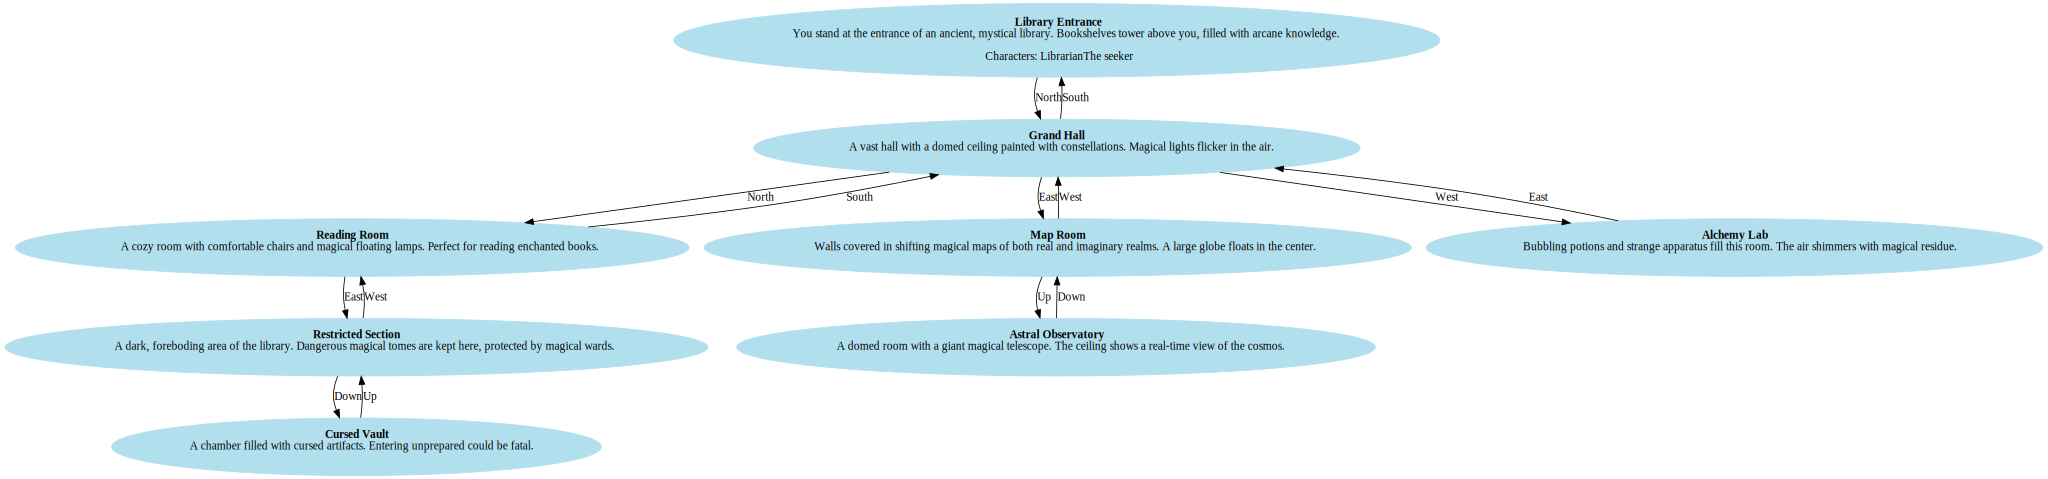

In [14]:
from text_adventure_games.viz import Visualizer
viz = Visualizer(game)
graph = viz.visualize()
graph